# imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# load data and create pandas table

In [2]:
ls *_results

deeprelu_results                    middlelinear_specializedtarget_results
deeprelu_specializedtarget_results  new_targets_results
middlelinear_SIM_results            new_targets_SGD_results


In [3]:
job_name = "new_targets_SGD"
res = pd.read_pickle(job_name+"_results")

In [4]:
res.columns

Index(['r', 'sigma', 'n', 'L', 'lambda', 'Test MSE', 'Train MSE',
       'Weight Decay', 'Learning Rate', 'Activations', 'Final Train MSE',
       'Final Weight Decay', 'Validation Squared Errors', 'Validation MSE',
       'Validation SEM', 'Validation STD of Squared Errors',
       'Validation MSE$/\sigma^2$', 'In-Distribution Squared Errors',
       'In-Distribution MSE', 'In-Distribution SEM',
       'In-Distribution STD of Squared Errors',
       'In-Distribution MSE$/\sigma^2$', 'Out-of-Distribution Squared Errors',
       'Out-of-Distribution MSE', 'Out-of-Distribution SEM',
       'Out-of-Distribution STD of Squared Errors',
       'Out-of-Distribution MSE$/\sigma^2$', 'Gradient Evaluations',
       'Gradient Singular Values', 'Active Subspace',
       'Active Subspace Distance', 'Principal Angle (Degrees)'],
      dtype='object')

# Check if Final Training Loss is Okay

In [5]:
trainMSE_threshold=5e-1 # HAD TO UP THRESHOLD FROM 1e-2
assert sum(res["Final Train MSE"] - res["sigma"] >= trainMSE_threshold) == 0

In [6]:
res[res["Final Train MSE"] >= trainMSE_threshold + res["sigma"]][["Final Train MSE","sigma"]]

,Final Train MSE,sigma


In [7]:
res = res[res["Final Train MSE"] < trainMSE_threshold + res["sigma"]] #filtering out bad fits

In [8]:
res

,r,sigma,n,L,lambda,Test MSE,Train MSE,Weight Decay,Learning Rate,Activations,...,Out-of-Distribution Squared Errors,Out-of-Distribution MSE,Out-of-Distribution SEM,Out-of-Distribution STD of Squared Errors,Out-of-Distribution MSE$/\sigma^2$,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance,Principal Angle (Degrees)
0,1,0.00,64,2,0.00100,1.961842,"[60.244835, 60.12138, 59.998505, 59.876213, 59...","[1340.939, 1340.9382, 1340.9375, 1340.9373, 13...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[14.432414, 1.9783444, 4.6000123, 0.0037509748...",10.834778,0.346092,15.658491,NaN,"[[-0.3743389, 0.9359075, -8.832689, -3.031515,...","[846.78326, 39.57947, 38.016026, 31.558115, 27...","[[0.018581383], [0.063863695], [-0.5828272], [...",0.174597,10.055200
1,1,0.25,64,2,0.00100,2.073465,"[60.175804, 60.053665, 59.932102, 59.81111, 59...","[1340.939, 1340.9382, 1340.9375, 1340.9373, 13...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[14.548234, 1.0345552, 6.0154924, 0.11426886, ...",11.174286,0.356031,16.108179,178.788574,"[[-0.31046337, 0.70582426, -8.515459, -3.12077...","[846.272, 39.386623, 38.59393, 31.803339, 26.8...","[[0.02274351], [0.05812503], [-0.5803299], [-0...",0.181184,10.438705
2,1,0.00,64,2,0.00010,1.963271,"[60.244835, 60.12138, 59.998505, 59.876213, 59...","[1340.9392, 1340.9387, 1340.9382, 1340.9382, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[14.33031, 1.9935324, 4.6115313, 0.0045040166,...",10.833346,0.345784,15.644578,NaN,"[[-0.36644307, 0.9520587, -8.828148, -3.011102...","[846.9025, 39.723083, 38.197945, 31.768042, 27...","[[0.018563606], [0.063847445], [-0.582794], [-...",0.174521,10.050781
3,1,0.25,64,2,0.00010,2.075025,"[60.175804, 60.053665, 59.932102, 59.811104, 5...","[1340.9392, 1340.9387, 1340.9384, 1340.9382, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[14.43211, 1.0426638, 6.0393744, 0.11159414, 0...",11.174950,0.355757,16.095778,178.799194,"[[-0.30057344, 0.7262951, -8.489792, -3.091934...","[846.2634, 39.621124, 38.77084, 32.02725, 26.9...","[[0.02268451], [0.05810323], [-0.5803398], [-0...",0.181193,10.439241
4,1,0.00,64,2,0.00001,1.963414,"[60.244835, 60.12138, 59.998505, 59.876213, 59...","[1340.9392, 1340.9387, 1340.9385, 1340.9382, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[14.319106, 1.994894, 4.612604, 0.0045793722, ...",10.833200,0.345750,15.643038,NaN,"[[-0.36578274, 0.95405275, -8.824972, -3.01552...","[846.9332, 39.73496, 38.210106, 31.786488, 27....","[[0.018556437], [0.063866034], [-0.5827884], [...",0.174528,10.051170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,0.25,2048,9,0.00100,0.066334,"[48.132156, 47.924564, 47.720306, 47.519203, 4...","[29352.748, 29352.56, 29352.383, 29352.21, 293...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.0143024055, 0.025092542, 0.045179598, 0.013...",0.067527,0.002148,0.097182,1.080437,"[[-0.08584377, 0.08991356, -6.440562, -1.72782...","[975.9519, 1.2109538, 0.0270644, 0.013571983, ...","[[0.008105717], [-0.009785244], [0.5984542], [...",0.003278,0.187789
284,1,0.00,2048,9,0.00010,0.000307,"[48.115868, 47.90709, 47.70166, 47.499405, 47....","[29352.918, 29352.9, 29352.896, 29352.883, 293...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.006108583, 0.00024577504, 0.00030066542, 2....",0.001620,0.000153,0.006911,NaN,"[[-0.086173624, 0.10994624, -6.46454, -1.76247...","[978.5081, 0.23724763, 0.05933322, 0.036404517...","[[0.007941367], [-0.010343365], [0.5981617], [...",0.000306,0.017523
285,1,0.25,2048,9,0.00010,0.066571,"[48.132156, 47.924564, 47.720306, 47.5192, 47....","[29352.92, 29352.9, 29352.896, 29352.89, 29352...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.016974747, 0.024733014, 0.046451706, 0.0044...",0.068544,0.002144,0.096988,1.096699,"[[-0.07925174, 0.065813

# Tuning Hyperparameters

##  determine the lambda parameter that gets the best Validation MSE for each (r,n,L)

In [9]:
validationmse_vs_lambda = res.pivot_table(values="Validation MSE",index = ("r","sigma","n","L","Activations"),columns=["lambda"])
validationmse_vs_lambda

lambda                       0.00001   0.00010   0.00100
r sigma n    L Activations                              
1 0.00  64   2 standard     1.861526  1.861395  1.860007
             3 standard     0.845680  0.845373  0.841780
             4 standard     0.094040  0.094089  0.094593
             5 standard     0.034419  0.034429  0.034525
             6 standard     0.018049  0.018050  0.018073
...                              ...       ...       ...
  0.25  2048 5 standard     0.068925  0.068479  0.065069
             6 standard     0.064125  0.063933  0.063299
             7 standard     0.063430  0.063406  0.063211
             8 standard     0.063370  0.063362  0.063216
             9 standard     0.063366  0.063344  0.063140

[96 rows x 3 columns]

In [10]:
bestlambda = validationmse_vs_lambda.idxmin(axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(bestlambda)

r  sigma  n     L  Activations
1  0.00   64    2  standard       0.00100
                3  standard       0.00100
                4  standard       0.00001
                5  standard       0.00001
                6  standard       0.00001
                7  standard       0.00001
                8  standard       0.00010
                9  standard       0.00010
          128   2  standard       0.00100
                3  standard       0.00100
                4  standard       0.00100
                5  standard       0.00100
                6  standard       0.00100
                7  standard       0.00100
                8  standard       0.00100
                9  standard       0.00001
          256   2  standard       0.00100
                3  standard       0.00100
                4  standard       0.00100
                5  standard       0.00100
                6  standard       0.00100
                7  standard       0.00100
                8  standard       0.00100
   

In [11]:
mask = [row["lambda"] == bestlambda[row["r"]][row["sigma"]][row["n"]][row["L"]][row["Activations"]] for rowindex,row in res.iterrows()]
res = res[mask]
res

,r,sigma,n,L,lambda,Test MSE,Train MSE,Weight Decay,Learning Rate,Activations,...,Out-of-Distribution Squared Errors,Out-of-Distribution MSE,Out-of-Distribution SEM,Out-of-Distribution STD of Squared Errors,Out-of-Distribution MSE$/\sigma^2$,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance,Principal Angle (Degrees)
0,1,0.00,64,2,0.00100,1.961842,"[60.244835, 60.12138, 59.998505, 59.876213, 59...","[1340.939, 1340.9382, 1340.9375, 1340.9373, 13...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[14.432414, 1.9783444, 4.6000123, 0.0037509748...",10.834778,0.346092,15.658491,NaN,"[[-0.3743389, 0.9359075, -8.832689, -3.031515,...","[846.78326, 39.57947, 38.016026, 31.558115, 27...","[[0.018581383], [0.063863695], [-0.5828272], [...",0.174597,10.055200
1,1,0.25,64,2,0.00100,2.073465,"[60.175804, 60.053665, 59.932102, 59.81111, 59...","[1340.939, 1340.9382, 1340.9375, 1340.9373, 13...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[14.548234, 1.0345552, 6.0154924, 0.11426886, ...",11.174286,0.356031,16.108179,178.788574,"[[-0.31046337, 0.70582426, -8.515459, -3.12077...","[846.272, 39.386623, 38.59393, 31.803339, 26.8...","[[0.02274351], [0.05812503], [-0.5803299], [-0...",0.181184,10.438705
6,1,0.00,64,3,0.00100,0.836296,"[60.49385, 60.4607, 60.42758, 60.3945, 60.3614...","[3341.8665, 3341.8652, 3341.8643, 3341.8633, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[1.5179236, 0.7467574, 3.4330742, 8.510361, 0....",5.917393,0.194311,8.791376,NaN,"[[-0.30982324, -0.09838414, -3.853639, -1.2429...","[884.08185, 46.546154, 34.583996, 19.974243, 1...","[[0.002074817], [-0.038675006], [0.5919223], [...",0.096722,5.550452
7,1,0.25,64,3,0.00100,0.960880,"[60.415447, 60.382584, 60.349754, 60.316963, 6...","[3341.8665, 3341.8652, 3341.864, 3341.8633, 33...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[3.1612566, 0.07026903, 4.4052124, 10.085148, ...",6.221574,0.197151,8.919872,99.545181,"[[-0.30703765, -0.074129835, -3.9728167, -1.44...","[880.4969, 46.859577, 37.355907, 20.256155, 17...","[[0.0051432294], [0.036455717], [-0.58935815],...",0.107501,6.171282
16,1,0.00,64,4,0.00001,0.091321,"[60.470627, 60.44942, 60.42823, 60.407047, 60....","[6010.1187, 6010.1187, 6010.1187, 6010.119, 60...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.12716207, 0.011615085, 0.059425034, 1.47599...",0.798297,0.044421,2.009789,NaN,"[[-0.32746273, 0.14026855, -4.9383235, -1.3424...","[961.3149, 21.766918, 6.8289285, 5.816429, 4.6...","[[0.01150714], [-0.015921239], [0.5958385], [0...",0.013833,0.792593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1,0.25,2048,7,0.00100,0.066392,"[48.34912, 48.137302, 47.928886, 47.723694, 47...","[18010.32, 18010.193, 18010.07, 18009.951, 180...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.015330287, 0.024257258, 0.045738358, 0.0063...",0.068405,0.002138,0.096722,1.094483,"[[-0.07807198, 0.071215734, -6.436388, -1.7129...","[976.39404, 2.77155, 0.47587237, 0.21826266, 0...","[[0.0080595575], [-0.009798323], [0.5984721], ...",0.003248,0.186087
277,1,0.25,2048,8,0.00100,0.066431,"[48.05083, 47.84445, 47.641464, 47.44166, 47.2...","[23350.389, 23350.24, 23350.096, 23349.959, 23...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.015352494, 0.02455045, 0.045319982, 0.00785...",0.068172,0.002152,0.097377,1.090748,"[[-0.081695825, 0.07611192, -6.4308743, -1.714...","[975.9852, 2.2872548, 0.11484404, 0.057580158,...","[[0.0080862595], [-0.009789219], [0.59844965],...",0.003257,0.186602
278,1,0.00,2048,8,0.00010,0.000290,"[48.034344, 47.826805, 47.622665, 47.42173, 47...","[23350.525, 23350.51, 23350.502, 23350.49, 233...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.0044318563, 0.00016628994, 0.00021502399, 1...",0.001364,0.000127,0.005742,NaN,"[[-0.08630812, 0.10952629, -6.46

##  determine the L parameter that gets the best validation MSE for each (r,n)

In [12]:
validationmse_vs_L = res.pivot_table(values="Validation MSE",index = ("r","sigma","n","Activations"),columns=["L"])
validationmse_vs_L = validationmse_vs_L.iloc[:,1:]
bestL = validationmse_vs_L.idxmin(axis=1)
pd.concat((validationmse_vs_L,bestL),axis=1)

3         4         5         6         7  \
r sigma n    Activations                                                     
1 0.00  64   standard     0.841780  0.094040  0.034419  0.018049  0.011226   
        128  standard     0.150038  0.028647  0.009278  0.003956  0.002438   
        256  standard     0.052417  0.008137  0.002395  0.001467  0.001240   
        512  standard     0.021805  0.003670  0.001205  0.000785  0.000771   
        1024 standard     0.006519  0.001507  0.000552  0.000407  0.000421   
        2048 standard     0.001973  0.000594  0.000271  0.000219  0.000239   
  0.25  64   standard     0.997940  0.199846  0.136766  0.118215  0.109985   
        128  standard     0.266227  0.142908  0.115830  0.099957  0.087742   
        256  standard     0.148446  0.094486  0.078308  0.074995  0.072688   
        512  standard     0.115120  0.084892  0.070753  0.068768  0.068244   
        1024 standard     0.089265  0.077303  0.068013  0.065016  0.064779   
        2048 standard     0.077522  0.070664  0.065069  0.063299  0.063211   

                                 8         9  0  
r sigma n    Activations                         
1 0.00  64   standard     0.010191  0.010461  8  
        128  standard     0.002261  0.002254  9  
        256  standard     0.001308  0.001304  7  
        512  standard     0.000922  0.000899  7  
        1024 standard     0.000531  0.000550  6  
        2048 standard     0.000286  0.000300  6  
  0.25  64   standard     0.108502  0.108112  9  
        128  standard     0.083528  0.082706  9  
        256  standard     0.069885  0.068601  9  
        512  standard     0.067543  0.066618  9  
        1024 standard     0.064689  0.064235  9  
        2048 standard     0.063216  0.063140  9

In [13]:
mask = [row["L"] == bestL[row["r"]][row["sigma"]][row["n"]][row["Activations"]] for rowindex,row in res.iterrows()]
bestLres = res[mask]
bestLres

,r,sigma,n,L,lambda,Test MSE,Train MSE,Weight Decay,Learning Rate,Activations,...,Out-of-Distribution Squared Errors,Out-of-Distribution MSE,Out-of-Distribution SEM,Out-of-Distribution STD of Squared Errors,Out-of-Distribution MSE$/\sigma^2$,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance,Principal Angle (Degrees)
38,1,0.00,64,8,0.00010,0.009726,"[60.220078, 60.208218, 60.196358, 60.184513, 6...","[23350.545, 23350.545, 23350.541, 23350.541, 2...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.007471394, 0.0060279416, 0.000413947, 0.020...",0.073914,0.004446,0.201151,NaN,"[[-0.083152264, 0.107587345, -5.9132485, -1.62...","[976.6806, 0.81139076, 0.09955315, 0.057539806...","[[0.008274926], [-0.010866686], [0.59704286], ...",0.004760,0.272721
45,1,0.25,64,9,0.00010,0.102850,"[60.257645, 60.24589, 60.234142, 60.222404, 60...","[29352.94, 29352.94, 29352.94, 29352.94, 29352...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.00010103722, 0.4865744, 0.07737728, 0.18195...",0.261962,0.009248,0.418400,4.191399,"[[-0.03983301, 0.041771695, -5.900878, -1.7404...","[979.2968, 0.354088, 0.05077419, 0.03353113, 0...","[[0.0037940422], [-0.0038622087], [0.5952914],...",0.030652,1.756521
94,1,0.00,128,9,0.00001,0.002278,"[49.721478, 49.70511, 49.688763, 49.672432, 49...","[29352.94, 29352.94, 29352.94, 29352.94, 29352...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.008395879, 0.0019980392, 0.00031478412, 5.2...",0.013327,0.000727,0.032904,NaN,"[[-0.086301446, 0.11632035, -6.251936, -1.7046...","[975.0839, 0.36252695, 0.061744813, 0.02973704...","[[0.0082269935], [-0.010971094], [0.5978793], ...",0.002065,0.118337
95,1,0.25,128,9,0.00001,0.078660,"[49.66536, 49.649216, 49.633095, 49.61698, 49....","[29352.94, 29352.94, 29352.94, 29352.94, 29352...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.0005800435, 0.19374946, 0.056717977, 0.0222...",0.138020,0.004667,0.211162,2.208320,"[[-0.05068484, 0.07106878, -6.2578034, -1.7620...","[976.7971, 1.0208756, 0.07227276, 0.03506776, ...","[[0.0050456673], [-0.007051912], [0.59555477],...",0.020764,1.189786
126,1,0.00,256,7,0.00100,0.001254,"[44.031754, 44.006393, 43.981102, 43.955856, 4...","[18010.434, 18010.418, 18010.404, 18010.387, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.0093569225, 0.00070219877, 0.00014092866, 5...",0.004920,0.000256,0.011570,NaN,"[[-0.08972621, 0.10826494, -6.3736615, -1.7449...","[974.8663, 1.4979017, 0.15926525, 0.10299473, ...","[[0.008042111], [-0.010233251], [0.5980201], [...",0.001197,0.068562
139,1,0.25,256,9,0.00100,0.067012,"[43.83897, 43.814613, 43.790306, 43.766052, 43...","[29352.918, 29352.893, 29352.861, 29352.84, 29...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.026499439, 0.056302767, 0.024226075, 0.0249...",0.087029,0.002777,0.125638,1.392469,"[[-0.060563684, 0.08357524, -6.4065084, -1.733...","[977.9496, 1.4150038, 0.0686737, 0.034464188, ...","[[0.0064562294], [-0.007879379], [0.5990804], ...",0.011458,0.656522
174,1,0.00,512,7,0.00100,0.000775,"[47.093452, 47.037453, 46.9817, 46.926178, 46....","[18010.416, 18010.387, 18010.352, 18010.316, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.009725045, 0.00066266564, 0.00014097395, 0....",0.003558,0.000230,0.010405,NaN,"[[-0.08796066, 0.10813412, -6.4125986, -1.7394...","[975.89606, 0.9133406, 0.1664582, 0.09848868, ...","[[0.00785053], [-0.010333064], [0.59816766], [...",0.000633,0.036295
187,1,0.25,512,9,0.00100,0.065664,"[47.077713, 47.023254, 46.969025, 46.915024, 4...","[29352.893, 29352.84, 29352.793, 29352.748, 29...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.024682421, 0.009433137, 0.08661703, 0.00898...",0.081404,0.002549,0.115334,1.302463,"[[-0.054531902, 0.05418621, -6.446266, -1.7329...","[977.6362, 2.2348795, 0.07238644, 0.024818964,...","[[0.0059342273], [-0

In [14]:
bestLres.sort_values(by=['r','n',"sigma"])

,r,sigma,n,L,lambda,Test MSE,Train MSE,Weight Decay,Learning Rate,Activations,...,Out-of-Distribution Squared Errors,Out-of-Distribution MSE,Out-of-Distribution SEM,Out-of-Distribution STD of Squared Errors,Out-of-Distribution MSE$/\sigma^2$,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance,Principal Angle (Degrees)
38,1,0.00,64,8,0.00010,0.009726,"[60.220078, 60.208218, 60.196358, 60.184513, 6...","[23350.545, 23350.545, 23350.541, 23350.541, 2...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.007471394, 0.0060279416, 0.000413947, 0.020...",0.073914,0.004446,0.201151,NaN,"[[-0.083152264, 0.107587345, -5.9132485, -1.62...","[976.6806, 0.81139076, 0.09955315, 0.057539806...","[[0.008274926], [-0.010866686], [0.59704286], ...",0.004760,0.272721
45,1,0.25,64,9,0.00010,0.102850,"[60.257645, 60.24589, 60.234142, 60.222404, 60...","[29352.94, 29352.94, 29352.94, 29352.94, 29352...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.00010103722, 0.4865744, 0.07737728, 0.18195...",0.261962,0.009248,0.418400,4.191399,"[[-0.03983301, 0.041771695, -5.900878, -1.7404...","[979.2968, 0.354088, 0.05077419, 0.03353113, 0...","[[0.0037940422], [-0.0038622087], [0.5952914],...",0.030652,1.756521
94,1,0.00,128,9,0.00001,0.002278,"[49.721478, 49.70511, 49.688763, 49.672432, 49...","[29352.94, 29352.94, 29352.94, 29352.94, 29352...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.008395879, 0.0019980392, 0.00031478412, 5.2...",0.013327,0.000727,0.032904,NaN,"[[-0.086301446, 0.11632035, -6.251936, -1.7046...","[975.0839, 0.36252695, 0.061744813, 0.02973704...","[[0.0082269935], [-0.010971094], [0.5978793], ...",0.002065,0.118337
95,1,0.25,128,9,0.00001,0.078660,"[49.66536, 49.649216, 49.633095, 49.61698, 49....","[29352.94, 29352.94, 29352.94, 29352.94, 29352...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.0005800435, 0.19374946, 0.056717977, 0.0222...",0.138020,0.004667,0.211162,2.208320,"[[-0.05068484, 0.07106878, -6.2578034, -1.7620...","[976.7971, 1.0208756, 0.07227276, 0.03506776, ...","[[0.0050456673], [-0.007051912], [0.59555477],...",0.020764,1.189786
126,1,0.00,256,7,0.00100,0.001254,"[44.031754, 44.006393, 43.981102, 43.955856, 4...","[18010.434, 18010.418, 18010.404, 18010.387, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.0093569225, 0.00070219877, 0.00014092866, 5...",0.004920,0.000256,0.011570,NaN,"[[-0.08972621, 0.10826494, -6.3736615, -1.7449...","[974.8663, 1.4979017, 0.15926525, 0.10299473, ...","[[0.008042111], [-0.010233251], [0.5980201], [...",0.001197,0.068562
139,1,0.25,256,9,0.00100,0.067012,"[43.83897, 43.814613, 43.790306, 43.766052, 43...","[29352.918, 29352.893, 29352.861, 29352.84, 29...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.026499439, 0.056302767, 0.024226075, 0.0249...",0.087029,0.002777,0.125638,1.392469,"[[-0.060563684, 0.08357524, -6.4065084, -1.733...","[977.9496, 1.4150038, 0.0686737, 0.034464188, ...","[[0.0064562294], [-0.007879379], [0.5990804], ...",0.011458,0.656522
174,1,0.00,512,7,0.00100,0.000775,"[47.093452, 47.037453, 46.9817, 46.926178, 46....","[18010.416, 18010.387, 18010.352, 18010.316, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.009725045, 0.00066266564, 0.00014097395, 0....",0.003558,0.000230,0.010405,NaN,"[[-0.08796066, 0.10813412, -6.4125986, -1.7394...","[975.89606, 0.9133406, 0.1664582, 0.09848868, ...","[[0.00785053], [-0.010333064], [0.59816766], [...",0.000633,0.036295
187,1,0.25,512,9,0.00100,0.065664,"[47.077713, 47.023254, 46.969025, 46.915024, 4...","[29352.893, 29352.84, 29352.793, 29352.748, 29...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",standard,...,"[0.024682421, 0.009433137, 0.08661703, 0.00898...",0.081404,0.002549,0.115334,1.302463,"[[-0.054531902, 0.05418621, -6.446266, -1.7329...","[977.6362, 2.2348795, 0.07238644, 0.024818964,...","[[0.0059342273], [-0

## What are the chosen lambda and L for each model?

In [15]:
bestres = pd.concat((res[res["L"] == 2],bestLres))

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(bestres.loc[:,:"lambda"].pivot_table(index=["r","sigma","n","L"],values=["lambda"]))

lambda
r sigma n    L         
1 0.00  64   2  0.00100
             8  0.00010
        128  2  0.00100
             9  0.00001
        256  2  0.00100
             7  0.00100
        512  2  0.00100
             7  0.00100
        1024 2  0.00100
             6  0.00100
        2048 2  0.00100
             6  0.00100
  0.25  64   2  0.00100
             9  0.00010
        128  2  0.00100
             9  0.00001
        256  2  0.00100
             9  0.00100
        512  2  0.00100
             9  0.00100
        1024 2  0.00100
             9  0.00100
        2048 2  0.00100
             9  0.00100

# Plotting

In [17]:
fontname = "Times New Roman"
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

## plots of all the singular values

1,64,2 [18.711443    0.87459105  0.8400434   0.6973424   0.6026423   0.5662879
  0.5199539   0.46415427  0.4213117   0.40325084  0.37652174  0.3657911
  0.3148857   0.29218957  0.25463328  0.23895632  0.21151942  0.20325413
  0.18346351  0.16504335] 0 0
1,64,3 [19.535633    1.0285344   0.7642056   0.4413726   0.38642773  0.34784135
  0.26496834  0.24261962  0.2025371   0.18357494  0.13465422  0.12458064
  0.10405158  0.10231143  0.09425908  0.07681803  0.07288607  0.06807368
  0.06553833  0.05403043] 0 0
1,64,4 [2.1242258e+01 4.8098549e-01 1.5089943e-01 1.2852614e-01 1.0316148e-01
 8.9848012e-02 8.1000380e-02 7.8334063e-02 6.8358578e-02 5.4854028e-02
 5.1678285e-02 4.5048807e-02 3.5819530e-02 3.4650952e-02 3.0558746e-02
 2.9293196e-02 2.8348494e-02 2.1768279e-02 2.0156903e-02 1.7348459e-02] 0 0
1,64,5 [2.1460012e+01 2.6099411e-01 4.3226000e-02 2.9732097e-02 2.6495101e-02
 2.4663080e-02 2.3870252e-02 2.1600485e-02 1.7594578e-02 1.5788110e-02
 1.4843519e-02 1.3578218e-02 1.2847636e-02 1.

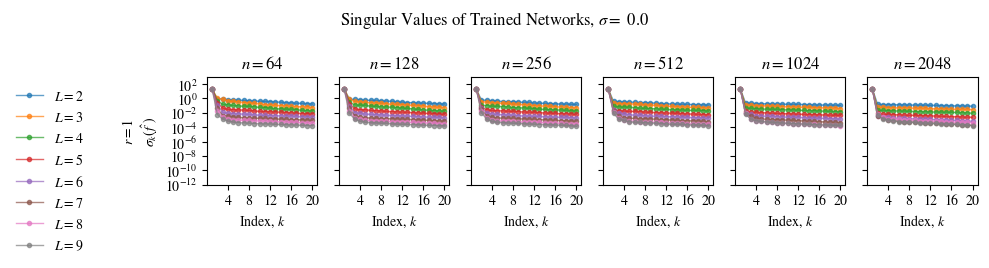

1,64,2 [18.700146    0.8703297   0.8528134   0.7027612   0.59297854  0.5832897
  0.5387093   0.46561494  0.42349327  0.42038462  0.393244    0.36539245
  0.3189944   0.28849608  0.25956488  0.24602428  0.21188517  0.1957815
  0.17899257  0.16353478] 0 0
1,64,3 [19.456417    1.0354601   0.82545674  0.44760203  0.3879239   0.34168237
  0.3042937   0.2534632   0.20692274  0.19569865  0.16929895  0.12825215
  0.12652808  0.1091461   0.0980171   0.08650884  0.07983209  0.07293832
  0.0627524   0.0595284 ] 0 0
1,64,4 [2.1210331e+01 5.4005760e-01 2.2370814e-01 1.3377991e-01 1.1598537e-01
 9.8372318e-02 8.7547943e-02 7.8663617e-02 6.6933207e-02 5.7553794e-02
 5.5534348e-02 4.6929672e-02 3.9049491e-02 3.8099967e-02 3.4852009e-02
 3.0865934e-02 2.8780136e-02 2.6241843e-02 1.9858906e-02 1.6659748e-02] 0 0
1,64,5 [2.14760284e+01 3.29206020e-01 5.87123930e-02 3.79674807e-02
 2.83501800e-02 2.42314618e-02 2.25024074e-02 2.08819881e-02
 1.93690639e-02 1.78036243e-02 1.52868452e-02 1.42598925e-02
 1.2

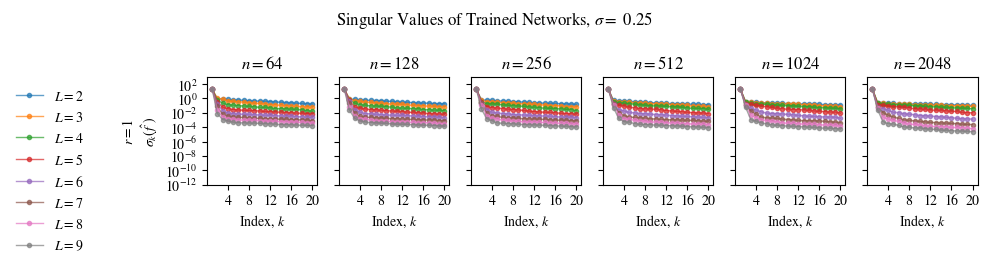

In [18]:
#all the singular values
for std in res.sigma.unique():
    f, ax = plt.subplots(nrows=len(res.r.unique()), ncols=len(res.n.unique()), sharex=True, sharey=True, figsize=(10,2.4))
    if len(res.r.unique()) == 1: ax = ax[np.newaxis]
    for rownum,row in res.iterrows():
        if row['sigma'] == std:
            whichrow = np.where(row['r'] == res.r.unique())[0][0]
            whichcol = np.where(row['n'] == res.n.unique())[0][0]
            print(rf"{row['r']},{row['n']},{row['L']}",row["Gradient Singular Values"]/np.sqrt(2048),whichrow,whichcol)
            ax[whichrow,whichcol].semilogy(row["Gradient Singular Values"]/np.sqrt(2048),label=rf"$L={row['L']}$",linewidth=1,alpha=0.7,marker=".")
            ax[whichrow,whichcol].set_xticks(list(range(3,20,4)),list(range(4,21,4)))
            ax[whichrow,whichcol].set_ylim(10**-9,10**3)
            ax[0,whichcol].set_title(rf"$n={row['n']}$")
            ax[-1,whichcol].set_xlabel(rf"Index, $k$")
    plt.subplot(len(res.r.unique()),len(res.n.unique()),1)
    leg = plt.legend()
    leg = plt.legend(bbox_to_anchor=(-1, 1))
    leg.get_frame().set_edgecolor('b')
    leg.get_frame().set_linewidth(0.0)
    for rnum,r in enumerate(res.r.unique()):
        plt.subplot(len(res.r.unique()),len(res.n.unique()),1+rnum*len(res.n.unique()))
        plt.ylabel(f"$r={r}$"+"\n"+r"$\sigma_k(\hat f)$")
        plt.yticks([10**p for p in range(-12,3,2)])
    plt.suptitle(rf"Singular Values of Trained Networks, $\sigma =$ {std}")
    plt.tight_layout()
    plt.savefig(job_name+f"_labelnoise{std}_sv.pdf",dpi=300)
    plt.show()

## Plots of L vs Validation error

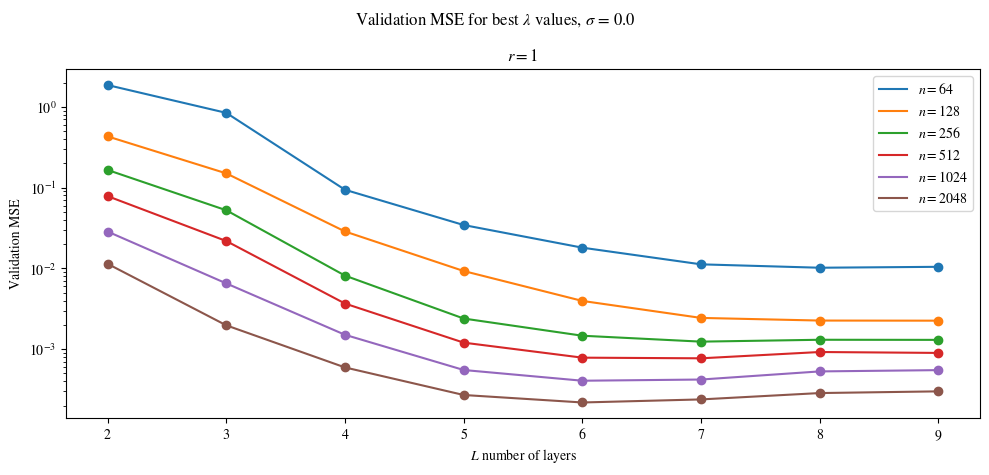

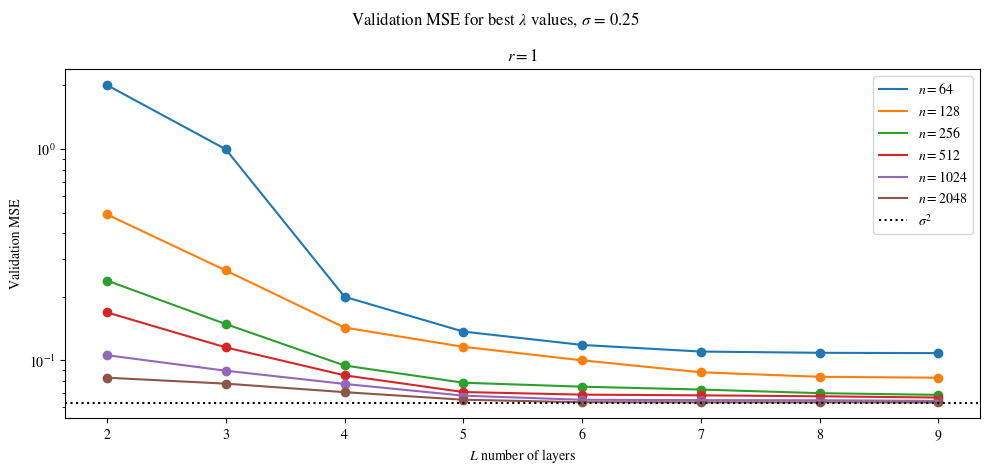

In [19]:
for std in res["sigma"].unique():
    f, ax = plt.subplots(ncols=len(res.r.unique()),nrows=1, sharex=True, sharey=False, figsize=(10,4.8))
    if len(res.r.unique()) == 1: ax = [ax]
    for rnum,r in enumerate(res.r.unique()):
        for n in res.n.unique():
                res_rnstd = res[(res.r == r) * (res.n == n) * (res["sigma"] == std)]
                ax[rnum].scatter(res_rnstd.L,res_rnstd[["Validation MSE"]])
                ax[rnum].semilogy(res_rnstd.L,res_rnstd[["Validation MSE"]],label=rf"$n={n}$")
                for _,model in res_rnstd.iterrows():
                    text = rf'$\lambda = {model["lambda"]:.0e}$' + f'\nfit {model["Final Train MSE"]:.1e}\nwd{model["Final Weight Decay"]:.1e}'
        ax[rnum].set_xlabel("$L$ number of layers")
        ax[rnum].set_title(rf"$r={r}$")
        if std > 0:
            ax[rnum].axhline(y=std**2, color='k', linestyle=':',label="$\sigma^2$")
        ax[0].set_ylabel("Validation MSE")
        f.suptitle(rf"Validation MSE for best $\lambda$ values, $\sigma$ = {std}")
    ax[0].legend()
    f.tight_layout()
    if int(std) == std:
        std = int(std)
    f.savefig(job_name+f"_labelnoise{std}_ValidationMSE.pdf",dpi=300)
    plt.show()

## Performance metrics with/without linear layers

In [20]:
columnwidth = 6.17406722223
markersize = 4
colors = {  
    0   :"C0",
    0.25:"C1",
}
labels = {
    "without extra linear layers":"-",
    "with extra linear layers"   :"--",
}
markers = {
    "without extra linear layers":".",
    "with extra linear layers"   :"x",
}

### generalization

(6, 32)
(6, 32)
(6, 32)
(6, 32)
(6, 32)
(6, 32)
(6, 32)
(6, 32)


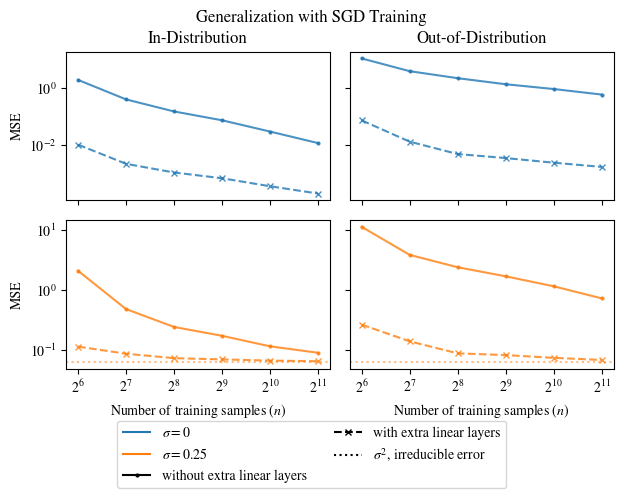

In [45]:
#generalization and OOD errors
handles = [
    Line2D([0], [0], color=color, ls='-', label=rf"$\sigma =${sigma}") for sigma,color in colors.items()
]
handles += [
    Line2D([0], [0], color='k', ls=ls, label=label, marker = markers[label], markersize=markersize) for label,ls in labels.items()
] 
handles += [
        Line2D([0], [0], color='k', ls=':', label='$\sigma^2$, irreducible error'),
]

f, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey="row", figsize=(columnwidth,4.25))
for col,metric in enumerate(['In-Distribution','Out-of-Distribution']):
    standard_errors = metric[:-3] + 'SEM'
    #just the data without label noise in the first row
    for row,sigma in enumerate([0,0.25]):
        for label,ls in labels.items():
            if label == "with extra linear layers":#"with linear layers":
                curr = bestLres[(bestLres.r == r) * (bestLres["sigma"]==sigma)]
            elif label == "without extra linear layers":#"without linear layers":
                curr = res[(res.L == 2) * (res.r == r) * (res["sigma"]==sigma)]
            print(curr.shape)
            points = curr[[metric + " MSE"]].values[:,0]
            marker = markers[label]
            ax[row,col].plot(curr.n,points,
                                linestyle=ls,
                                marker=marker,
                                markersize=markersize,
                                color=colors[sigma],
                                alpha=0.8)
            #horizontal dashed line for minimal possible MSE (ie sigma^2) in plots with label noise
            ax[row,col].axhline(y=sigma**2, color=colors[sigma], linestyle=':',alpha=0.3)
        #plot set up
        ax[row,col].set_xscale("log",base=2)
        ax[row,col].set_xticks([2**k for k in range(6,12)])
        ax[row,col].set_yscale("log",base=10)
        ax[row,0].set_ylabel(f"MSE",wrap=True)
        ax[0,col].set_title(metric,wrap=True)
        ax[-1,col].set_xlabel("Number of training samples ($n$)")
        ax[row,col].minorticks_off()
f.legend(handles=handles, ncol=2, loc = 'upper center', bbox_to_anchor=(0.5,0.03))
plt.suptitle(f"Generalization with SGD Training")
plt.tight_layout(pad=0.5,h_pad=1.08, w_pad=1.08)
plt.savefig(job_name+f"Generalization.pdf",dpi=300,bbox_inches='tight')
plt.show()

### singular values

1 64 0 0
1 128 0 1
1 256 0 2
1 512 1 0
1 1024 1 1
1 2048 1 2


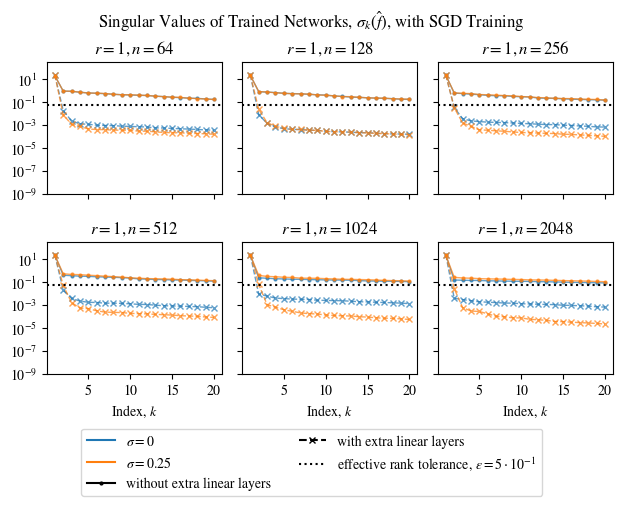

In [48]:
handles = [
    Line2D([0], [0], color=color, ls='-', label=rf"$\sigma =${sigma}") for sigma,color in colors.items()
]
handles += [
    Line2D([0], [0], color='k', ls=ls, label=label, marker = markers[label], markersize=markersize) for label,ls in labels.items()
] 
handles += [Line2D([0], [0], color='k', ls=':', label=r"effective rank tolerance, $\varepsilon = 5\cdot10^{-1}$")]

ranktol = 5e-2 #INCREASED FROM 1e-3
f, ax = plt.subplots(nrows=len(res.r.unique())*2, ncols=3, sharex=True, sharey=True, figsize=(columnwidth,4.25))#,5.75))
for rnum,r in enumerate(res.r.unique()):
    for nnum,n in enumerate(res.n.unique()):
        row = 2*rnum + nnum // 3
        col = nnum % 3
        print(r,n,row,col)
        for sigma in res.sigma.unique():
            for label,ls in labels.items():
                if label == "with extra linear layers":#"with linear layers":
                    curr = bestLres[(bestLres.r == r) * (bestLres.n == n) * (bestLres["sigma"] == sigma)]
                elif label == "without extra linear layers":#"without linear layers":
                    curr = res[(res.L == 2) * (res.n == n) * (res.r == r) * (res["sigma"]==sigma)]
                marker = markers[label]
                ax[row,col].semilogy(curr["Gradient Singular Values"].values[0]/np.sqrt(2048),
                    linestyle=ls,
                    linewidth=1,
                    alpha=0.7,
                    marker=marker,
                    markersize=markersize,
                    color=colors[sigma])
        ax[row,col].axhline(y=ranktol, color='k', linestyle=':',alpha=1, label = r"effective rank tolerance, $\varepsilon = 10^{1}$")
        ax[row,col].set_xticks(list(range(4,20,5)),list(range(5,21,5)))
        ax[0,0].set_yticks([10**p for p in range(-9,3,2)])
        ax[row,col].set_title(rf"$r={r},n={n}$")
        ax[-1,col].set_xlabel(rf"Index, $k$")
        ax[row,col].set_ylim(10**(-9),10**(2.5))
f.legend(handles=handles, ncol=2, loc = 'upper center', bbox_to_anchor=(0.5,0.01))
plt.suptitle(r"Singular Values of Trained Networks, $\sigma_k(\hat{f})$, with SGD Training")
plt.tight_layout(pad=0.5,h_pad=1.08, w_pad=1.08)
plt.savefig(job_name+f"_labelnoise_sv.pdf",dpi=300, bbox_inches='tight')
plt.show()
handles.pop()

### active subspaces

0.0
0.25
0.0
0.25


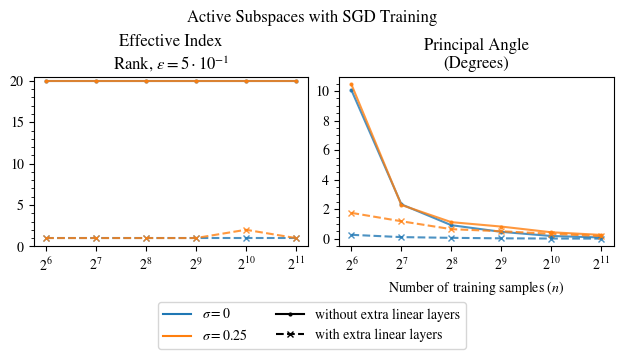

In [51]:
handles = [
    Line2D([0], [0], color=color, ls='-', label=rf"$\sigma =${sigma}") for sigma,color in colors.items()
]
handles += [
    Line2D([0], [0], color='k', ls=ls, label=label, marker = markers[label], markersize=markersize) for label,ls in labels.items()
] 

#active subspace error plot
f, ax = plt.subplots(ncols=2,nrows=1, sharex=True, sharey=False, figsize=(columnwidth,3))
for row,metric in enumerate([r"Effective Index Rank, $\varepsilon = 5\cdot10^{-1}$","Principal Angle (Degrees)"]):
    for sigma in res.sigma.unique():
        print(sigma)
        for label,ls in labels.items():
            if label == "with extra linear layers":#"with linear layers":
                curr = bestLres[(bestLres.r == r) * (bestLres["sigma"] == sigma)]
            elif label == "without extra linear layers":#"without linear layers":
                curr = res[(res.L == 2) * (res.r == r) * (res["sigma"]==sigma)]
            if metric == "Principal Angle (Degrees)":
                points = curr[[metric]].values[:,0]
            elif metric == r"Effective Index Rank, $\varepsilon = 5\cdot10^{-1}$":
                points = (np.array(curr["Gradient Singular Values"].tolist())/np.sqrt(2048) > ranktol).sum(axis=1)
                ax[row].set_yticks(np.arange(0,21,5))
                ax[row].set_ylim(0,20.5)
            marker = markers[label]
            ax[row].plot(curr.n,points,
                                linestyle=ls,
                                color=colors[sigma],
                                marker=marker,
                                markersize=markersize,
                                alpha=0.8)
            # for (_,model),y in zip(curr.iterrows(),points):
            #     text = rf'$\lambda = {model["lambda"]:.0e}$' + f'\nL = {model["L"]}\nfit {model["Final Train MSE"]:.1e}\nwd{model["Final Weight Decay"]:.1e}\nVal{model["Validation MSE"]:.1e}'
            #     ax[row,col].annotate(text,[model["n"],y],fontsize=1)
    #plot set up
    ax[row].set_title(metric[:15] + '\n' + metric[16:])
    ax[0].set_yticks(range(21), minor=True)
    ax[row].set_xscale("log",base=2)
    ax[row].set_xticks([2**k for k in range(6,12)])
    ax[1].set_xlabel("Number of training samples ($n$)")
    ax[row].minorticks_on()
f.legend(handles=handles, ncol=2, loc = 'upper center', bbox_to_anchor=(0.5,0.03))
plt.suptitle(f"Active Subspaces with SGD Training")
plt.tight_layout(pad=0.5,h_pad=0.5, w_pad=0.5)
plt.savefig(job_name+f"Active Subspaces.pdf",dpi=300,bbox_inches='tight')
plt.show()

## training

1 2
0 0
0 1
0 2
1 0
1 1


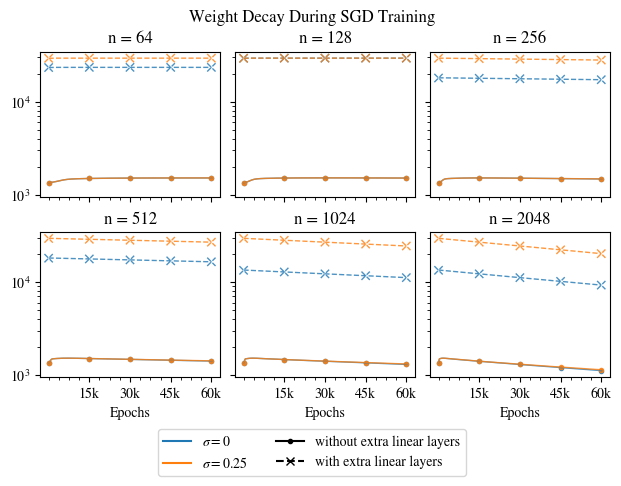

1 2
0 0
0 1
0 2
1 0
1 1


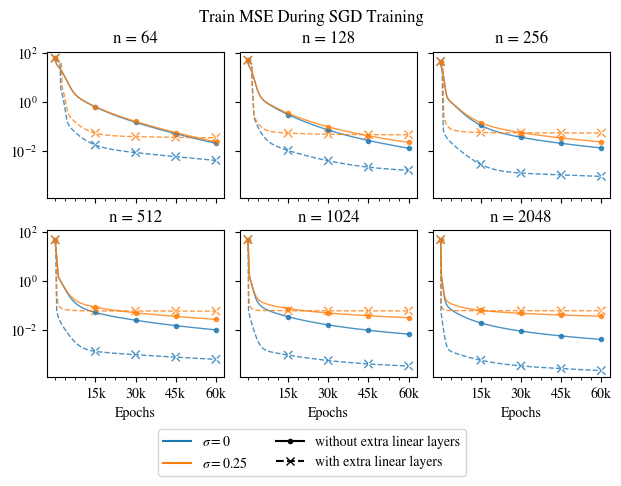

In [64]:
handles = [
    Line2D([0], [0], color=color, ls='-', label=rf"$\sigma =${sigma}") for sigma,color in colors.items()
]
handles += [
    Line2D([0], [0], color='k', ls=ls, marker = markers[label], label=label) for label,ls in labels.items()
] 

#training time plot
for metric in ["Weight Decay","Train MSE"]:
    f, ax = plt.subplots(ncols=3,nrows=len(res.n.unique())//3, sharex=True, sharey=True, figsize=(columnwidth,4.25))
    if len(res.r.unique()) == 1: ax = ax[:,np.newaxis]
    for nnum,n in enumerate(res.n.unique()):
        print(row,col)
        row = nnum //3
        col = nnum % 3
        for sigma in res.sigma.unique():
            for label,ls in labels.items():
                if label == "with extra linear layers":
                    curr = bestLres[(bestLres.r == r) * (bestLres.n == n) * (bestLres["sigma"] == sigma)]
                elif label == "without extra linear layers":
                    curr = res[(res.L == 2) * (res.r == r) * (res.n == n) * (res["sigma"]==sigma)]
                assert curr[metric].shape[0] == 1 # make sure there's only one row
                values_to_plot = curr[metric].iloc[0]
                epochs = len(values_to_plot)
                ax[row,0,col].plot(np.arange(epochs),values_to_plot,
                                    linestyle=ls,
                                    color=colors[sigma],
                                    linewidth = 1,
                                    alpha=0.8)
                ax[row,0,col].scatter(np.arange(epochs)[::15_000],values_to_plot[::15_000],
                                    linestyle=ls,
                                    color=colors[sigma],
                                    marker=markers[label],
                                    linewidth = 1,
                                    alpha=0.8)
            #plot set up
            ax[row,0,col].set_title(f"n = {n}")
            ax[row,0,col].set_yscale("log",base=10)
            ax[row,0,col].minorticks_on()
            ax[-1,0,col].set_xlabel("Epochs")
            ticks = np.arange(15_000,epochs,step=15_000)
            ax[-1,0,col].set_xticks(ticks=ticks, labels=[str(t)[:-3]+'k' for t in ticks])
    f.legend(handles=handles, ncol=2, loc = 'upper center', bbox_to_anchor=(0.5,0.01))
    plt.suptitle(metric+" During SGD Training")
    plt.tight_layout(pad=0.5,h_pad=0.5, w_pad=0.5)
    plt.savefig(job_name+metric+"training.pdf",dpi=300,bbox_inches='tight')
    plt.show()